In [8]:
%matplotlib inline

In [17]:
import stats_enriched_tweets
from plots import plot_templates
from collections import defaultdict
import matplotlib.pyplot as plt

In [10]:
# countryIndex = stats_enriched_tweets.buildCountrySentiIndex("/Users/muntean/refugees-output/refugees-with-final-new.json")
# print "finished building index", len(countryIndex)

def buildCountrySentiIndex(filename, location_field_name, senti_field_name):
    """
    The structure is a dictionary < location : dictionary <date, [list of sentiments - repeating e.g. 0,1,1,0,1 ...]> >
    :param filename:
    :return:
    """
    countryIndex = defaultdict(lambda : defaultdict(list))
    tweetsAsDict = stats_enriched_tweets.tweetIter(filename)
    i = 0
    for tweet in tweetsAsDict:
        i += 1
        if tweet[location_field_name] and senti_field_name in tweet:
            countries = tweet[location_field_name]
            day = tweet["day"]
            if day>20150909:
                print day
            sentiment = tweet[senti_field_name]
            if senti_field_name == "sentiment_tweet":
                if sentiment == "pro_ref":
                    senti = 1
                else:
                    senti = 0
            for country in countries:
#                 if country == "united kingdom":
#                     print day
                countryIndex[country][day].append(senti)

        # if i % 30000 == 0:
        #     # print i
        #     break
    return countryIndex

In [11]:
countryIndex = buildCountrySentiIndex("/Users/muntean/refugees-output/refugees-with-final-new.json", "text_location_mentions_c", "sentiment_tweet")

In [ ]:
print countryIndex.keys()

In [ ]:
def plotCountrySentimentPerDay(dailySentiDict):
    labels = list()
    against = list()
    pro = list()

    dailySentiDictSorted = sorted(dailySentiDict.iteritems(), key=lambda x: x[0])  # order by date
    for record in dailySentiDictSorted:
        day = record[0]
        sentiList = record[1]
        labels.append(day)
        count_pro = sentiList.count(1)
        pro.append(count_pro)
        count_anti = sentiList.count(0)
        against.append(count_anti)

    plot_templates.plotBarWithLables2Distrib(against, pro, labels, "Country Sentiment per Day", rot=70)

In [ ]:
plotCountrySentimentPerDay(countryIndex["france"])

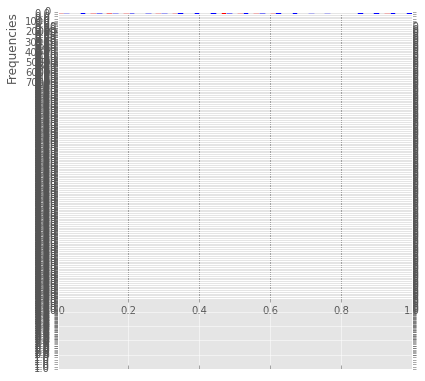

In [12]:
plot_templates.plotCountrySentiment(countryIndex)

In [15]:
def plotCountrySentiment(countryIndex):

    plot_templates.setStyle()
    num_countries = len(countryIndex)

    fig, ax = plt.subplots(num_countries, 1)

    i = 0
    for country in countryIndex[:1]:
        labels = list()
        against = list()
        pro = list()

        dailySentiDictSorted = sorted(countryIndex[country].iteritems(), key=lambda x: x[0])  # order by date
        for record in dailySentiDictSorted:
            day = record[0]
            sentiList = record[1]
            labels.append(day)
            count_pro = sentiList.count(1)
            pro.append(count_pro)
            count_anti = sentiList.count(0)
            against.append(count_anti)

        # plotSubplot(ax[i], against, pro, labels, country.capitalize() + "sentiment per Day", rot=70)
        # i += 1
        ind = np.arange(len(against))  # the x locations for the groups
        width = 0.35  # the width of the bars

        rects1 = ax[i].bar(ind, against, width, color='r')
        rects2 = ax[i].bar(ind + width, pro, width, color='b')

        # add some text for labels, title and axes ticks
        ax[i].set_ylabel('Frequencies')
        ax[i].set_title(country.capitalize() + "sentiment per Day")
        ax[i].set_xticks(ind + width)
        ax[i].set_xticklabels(labels)

        plt.setp(ax[i].get_xticklabels(), rotation=70, horizontalalignment='right')

    plt.show
#     plt.tight_layout()
#     plt.savefig("/Users/muntean/mentioned-county-sentim.pdf")

In [16]:
plotCountrySentiment(countryIndex)

NameError: global name 'plt' is not defined